# **Month 02 (Mini-project) Models**

## **Problem Statement**
In a real-world hospital setting, accurately predicting whether a Salmonella Typhi strain is resistant or sensitive to antibiotics based on clinical features is critical for effective treatment. This project aims to classify strains as resistant or sensitive using a Decision Tree Classifier, leveraging features such as age, specimen type, and antibiotic used to guide treatment decisions.

##### **Dataset**
The Salmonella Typhi blood culture dataset comprises clinical data from patients diagnosed with Salmonella Typhi infections. This dataset includes various features related to patient demographics, specimen details, and antibiotic sensitivity, which are crucial for understanding resistance patterns and informing treatment decisions.

In [1]:
import pandas as pd 
df = pd.read_excel("BloodCultureReport.xlsx")
print(df.shape)
print(df.head())

(28278, 13)
             MRNO        AGE       CPT_NAME BIRTH_DATE      DAYS  \
0  K0200022844920  1 Year(s)  Culture Blood 2022-10-03    5 DAYS   
1  K0200005254214  1 Year(s)  Culture Blood 2022-02-03  48 Hours   
2  K0200005413768  1 Year(s)  Culture Blood 2022-11-08  48 Hours   
3  K0200005293032  1 Year(s)  Culture Blood 2022-11-12  24 Hours   
4  K0200004642901  1 Year(s)  Culture Blood 2021-12-22  24 Hours   

  ORGAN_CLASSIFICATION         REPORT_DATE MCROA_SENSITIVE SPECIMEN_NAME  \
0        GRAM -VE RODS 2022-10-26 12:14:02  Resistant To :         Blood   
1        GRAM -VE RODS 2023-05-06 11:30:43  Resistant To :         Blood   
2        GRAM -VE RODS 2023-06-12 10:25:00  Resistant To :         Blood   
3        GRAM -VE RODS 2023-05-19 10:27:43  Resistant To :         Blood   
4        GRAM -VE RODS 2022-10-03 09:55:12  Sensitive To :         Blood   

        ANTIBIOTIC          ORGANISM SHORT_NAME INTENSITY  
0       Ampicillin  Salmonella typhi          H     Heavy  
1 

##### **Missing values in dataframe.**

In [2]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

SHORT_NAME    3381
INTENSITY     3381
dtype: int64

##### **Check the data types of the short_name and intensity columns to determine the appropriate approach for handling missing values.**

In [3]:
df[['SHORT_NAME', 'INTENSITY']].dtypes

SHORT_NAME    object
INTENSITY     object
dtype: object

##### **Calculate mode values, fill misising values and assign back to dataframe.**

In [6]:
short_name_mode = df['SHORT_NAME'].mode()[0]
intensity_mode = df['INTENSITY'].mode()[0]
df['SHORT_NAME'] = df['SHORT_NAME'].fillna(short_name_mode)
df['INTENSITY'] = df['INTENSITY'].fillna(intensity_mode)

##### **Verify no missing values remain**

In [7]:
missing_values_after = df[['SHORT_NAME', 'INTENSITY']].isnull().sum()
print(missing_values_after)

SHORT_NAME    0
INTENSITY     0
dtype: int64


##### **Check the data types of all columns.**

In [8]:
df.dtypes

MRNO                            object
AGE                             object
CPT_NAME                        object
BIRTH_DATE              datetime64[ns]
DAYS                            object
ORGAN_CLASSIFICATION            object
REPORT_DATE             datetime64[ns]
MCROA_SENSITIVE                 object
SPECIMEN_NAME                   object
ANTIBIOTIC                      object
ORGANISM                        object
SHORT_NAME                      object
INTENSITY                       object
dtype: object

##### **Check unique values in each column.**

In [9]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'MRNO': array(['K0200022844920', 'K0200005254214', 'K0200005413768', ...,
        'K0200005666461', 'K0200005838362', 'K0200005646525'], dtype=object),
 'AGE': array(['1 Year(s)', '10 Year(s)', '11 Month(s)', '11 Year(s)',
        '12 Year(s)', '13 Year(s)', '14 Year(s)', '15 Year(s)',
        '16 Year(s)', '17 Year(s)', '18 Year(s)', '19 Year(s)',
        '2 Year(s)', '20 Year(s)', '21 Year(s)', '22 Year(s)',
        '23 Year(s)', '24 Year(s)', '25 Year(s)', '26 Year(s)',
        '27 Year(s)', '28 Year(s)', '29 Year(s)', '3 Month(s)',
        '3 Year(s)', '30 Year(s)', '31 Year(s)', '32 Year(s)',
        '33 Year(s)', '34 Year(s)', '35 Year(s)', '36 Year(s)',
        '37 Year(s)', '38 Year(s)', '39 Year(s)', '4 Month(s)',
        '4 Year(s)', '40 Year(s)', '41 Year(s)', '42 Year(s)',
        '43 Year(s)', '45 Year(s)', '46 Year(s)', '48 Year(s)',
        '49 Year(s)', '5 Year(s)', '50 Year(s)', '51 Year(s)',
        '52 Year(s)', '53 Year(s)', '55 Year(s)', '56 Year(s)',
        '57 

## **Columns Operation and Transformation** 

#### **Medical Record Number**

In [10]:
unique_mrnos = df['MRNO'].unique()
print(unique_mrnos)

['K0200022844920' 'K0200005254214' 'K0200005413768' ... 'K0200005666461'
 'K0200005838362' 'K0200005646525']


##### **Since MRNO is just an identifier and doesn’t contribute to the prediction, dropping it is the right approach.**

In [11]:
df = df.drop(columns=['MRNO'])

In [12]:
print(df.head()) 
print(df.info()) 

         AGE       CPT_NAME BIRTH_DATE      DAYS ORGAN_CLASSIFICATION  \
0  1 Year(s)  Culture Blood 2022-10-03    5 DAYS        GRAM -VE RODS   
1  1 Year(s)  Culture Blood 2022-02-03  48 Hours        GRAM -VE RODS   
2  1 Year(s)  Culture Blood 2022-11-08  48 Hours        GRAM -VE RODS   
3  1 Year(s)  Culture Blood 2022-11-12  24 Hours        GRAM -VE RODS   
4  1 Year(s)  Culture Blood 2021-12-22  24 Hours        GRAM -VE RODS   

          REPORT_DATE MCROA_SENSITIVE SPECIMEN_NAME       ANTIBIOTIC  \
0 2022-10-26 12:14:02  Resistant To :         Blood       Ampicillin   
1 2023-05-06 11:30:43  Resistant To :         Blood       Ampicillin   
2 2023-06-12 10:25:00  Resistant To :         Blood       Ampicillin   
3 2023-05-19 10:27:43  Resistant To :         Blood  Chloramphenicol   
4 2022-10-03 09:55:12  Sensitive To :         Blood         Amikacin   

           ORGANISM SHORT_NAME INTENSITY  
0  Salmonella typhi          H     Heavy  
1  Salmonella typhi          L     Light  

#### **Age**

In [13]:
print(df['AGE'].unique())

['1 Year(s)' '10 Year(s)' '11 Month(s)' '11 Year(s)' '12 Year(s)'
 '13 Year(s)' '14 Year(s)' '15 Year(s)' '16 Year(s)' '17 Year(s)'
 '18 Year(s)' '19 Year(s)' '2 Year(s)' '20 Year(s)' '21 Year(s)'
 '22 Year(s)' '23 Year(s)' '24 Year(s)' '25 Year(s)' '26 Year(s)'
 '27 Year(s)' '28 Year(s)' '29 Year(s)' '3 Month(s)' '3 Year(s)'
 '30 Year(s)' '31 Year(s)' '32 Year(s)' '33 Year(s)' '34 Year(s)'
 '35 Year(s)' '36 Year(s)' '37 Year(s)' '38 Year(s)' '39 Year(s)'
 '4 Month(s)' '4 Year(s)' '40 Year(s)' '41 Year(s)' '42 Year(s)'
 '43 Year(s)' '45 Year(s)' '46 Year(s)' '48 Year(s)' '49 Year(s)'
 '5 Year(s)' '50 Year(s)' '51 Year(s)' '52 Year(s)' '53 Year(s)'
 '55 Year(s)' '56 Year(s)' '57 Year(s)' '58 Year(s)' '59 Year(s)'
 '6 Month(s)' '6 Year(s)' '60 Year(s)' '61 Year(s)' '63 Year(s)'
 '64 Year(s)' '65 Year(s)' '66 Year(s)' '69 Year(s)' '7 Month(s)'
 '7 Year(s)' '70 Year(s)' '71 Year(s)' '72 Year(s)' '73 Year(s)'
 '75 Year(s)' '8 Month(s)' '8 Year(s)' '80 Year(s)' '81 Year(s)'
 '9 Month(s)' '9 

##### **Convert datatype, extract number and unit and convert month to years**

In [14]:
import re
def convert_age_to_years(age_str):
    # Extract the number and the unit (years or months)
    match = re.match(r'(\d+)\s(Year|Month)', age_str)
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        if unit == 'Year':
            return number
        elif unit == 'Month':
            return round(number / 12, 2)  # Convert months to years
    return None

# Apply the function to the AGE column
df['AGE'] = df['AGE'].apply(convert_age_to_years)

print(df['AGE'].unique())

[ 1.   10.    0.92 11.   12.   13.   14.   15.   16.   17.   18.   19.
  2.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.    0.25
  3.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.    0.33
  4.   40.   41.   42.   43.   45.   46.   48.   49.    5.   50.   51.
 52.   53.   55.   56.   57.   58.   59.    0.5   6.   60.   61.   63.
 64.   65.   66.   69.    0.58  7.   70.   71.   72.   73.   75.    0.67
  8.   80.   81.    0.75  9.   98.  ]


In [15]:
age_dtype = df['AGE'].dtype
print(f"Data type of 'AGE': {age_dtype}")

Data type of 'AGE': float64


#### **Current Procedural Terminology Name**

In [17]:
print(df['CPT_NAME'].unique())

['Culture Blood']


#####  **Binary feature indicating the presence of 'Culture Blood'.**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CPT_NAME'] = le.fit_transform(df['CPT_NAME'])
print(df['CPT_NAME'].unique())

[0]


In [19]:
cpt_name_dtype = df['CPT_NAME'].dtype
print(f"Data type of 'CPT_NAME': {cpt_name_dtype}")

Data type of 'CPT_NAME': int32


#### **Birth Date**

##### **Convert birth_date to datetime format.**

In [20]:
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce')

# Extract year, month, and day from BIRTH_DATE
df['BIRTH_YEAR'] = df['BIRTH_DATE'].dt.year
df['BIRTH_MONTH'] = df['BIRTH_DATE'].dt.month
df['BIRTH_DAY'] = df['BIRTH_DATE'].dt.day


##### **Feature Engineering "age from birth date"**

In [21]:
# Calculate age in years
today = pd.Timestamp.today()
df['AGE_FROM_BIRTH_DATE'] = (today - df['BIRTH_DATE']).dt.days // 365

# Print columns to check if new features are added
print("Columns in DataFrame:")
print(df.columns)

# Print the first few rows to check the new features
print("\nFirst few rows of the DataFrame:")
print(df[['BIRTH_YEAR', 'BIRTH_MONTH', 'BIRTH_DAY', 'AGE_FROM_BIRTH_DATE']].head())

Columns in DataFrame:
Index(['AGE', 'CPT_NAME', 'BIRTH_DATE', 'DAYS', 'ORGAN_CLASSIFICATION',
       'REPORT_DATE', 'MCROA_SENSITIVE', 'SPECIMEN_NAME', 'ANTIBIOTIC',
       'ORGANISM', 'SHORT_NAME', 'INTENSITY', 'BIRTH_YEAR', 'BIRTH_MONTH',
       'BIRTH_DAY', 'AGE_FROM_BIRTH_DATE'],
      dtype='object')

First few rows of the DataFrame:
   BIRTH_YEAR  BIRTH_MONTH  BIRTH_DAY  AGE_FROM_BIRTH_DATE
0        2022           10          3                    1
1        2022            2          3                    2
2        2022           11          8                    1
3        2022           11         12                    1
4        2021           12         22                    2


#### **Days**
These values likely represent the time elapsed or the time period associated with a specific clinical event, such as the time between sample collection and reporting, the duration of a treatment, or the time until an outcome was observed.

In [22]:
print(df['DAYS'].unique())

['5 DAYS' '48 Hours' '24 Hours' '4 DAYS' '72 Hours' '7 DAYS' '6 DAYS'
 '18 Hours' '30 Hours' '42 Hours' '12 Hours']


In [23]:
print("Data type of 'DAYS':", df['DAYS'].dtype)

Data type of 'DAYS': object


In [24]:
df.dtypes

AGE                            float64
CPT_NAME                         int32
BIRTH_DATE              datetime64[ns]
DAYS                            object
ORGAN_CLASSIFICATION            object
REPORT_DATE             datetime64[ns]
MCROA_SENSITIVE                 object
SPECIMEN_NAME                   object
ANTIBIOTIC                      object
ORGANISM                        object
SHORT_NAME                      object
INTENSITY                       object
BIRTH_YEAR                       int32
BIRTH_MONTH                      int32
BIRTH_DAY                        int32
AGE_FROM_BIRTH_DATE              int64
dtype: object

##### **function to convert duration strings to numeric days**

In [25]:
import pandas as pd
import numpy as np


def convert_to_days(duration):
    if pd.isna(duration):
        return np.nan
    duration = duration.strip().upper()
    if 'DAYS' in duration:
        return float(duration.replace('DAYS', '').strip())
    elif 'HOURS' in duration:
        hours = float(duration.replace('HOURS', '').strip())
        return hours / 24  # Convert hours to days
    else:
        return np.nan

# Apply the conversion function to the 'DAYS' column
df['DAYS'] = df['DAYS'].apply(convert_to_days)

print("Data type of 'DAYS':", df['DAYS'].dtype)
print("Unique values in 'DAYS':", df['DAYS'].unique())
print("Missing values in 'DAYS':", df['DAYS'].isnull().sum())

Data type of 'DAYS': float64
Unique values in 'DAYS': [5.   2.   1.   4.   3.   7.   6.   0.75 1.25 1.75 0.5 ]
Missing values in 'DAYS': 0


##### **Feature Engineering in Days coulmn**

In [26]:
bins = [0, 1, 3, 7, np.inf]
labels = ['0-1', '1-3', '3-7', '7+']
df['DAYS_CATEGORY'] = pd.cut(df['DAYS'], bins=bins, labels=labels)

In [27]:
print("Columns in DataFrame:")
print(df.columns)

Columns in DataFrame:
Index(['AGE', 'CPT_NAME', 'BIRTH_DATE', 'DAYS', 'ORGAN_CLASSIFICATION',
       'REPORT_DATE', 'MCROA_SENSITIVE', 'SPECIMEN_NAME', 'ANTIBIOTIC',
       'ORGANISM', 'SHORT_NAME', 'INTENSITY', 'BIRTH_YEAR', 'BIRTH_MONTH',
       'BIRTH_DAY', 'AGE_FROM_BIRTH_DATE', 'DAYS_CATEGORY'],
      dtype='object')


##### **Convert categorical days to numeric**

In [28]:
df['DAYS_CATEGORY_encoded'] = df['DAYS_CATEGORY'].cat.codes

In [29]:
df.dtypes

AGE                             float64
CPT_NAME                          int32
BIRTH_DATE               datetime64[ns]
DAYS                            float64
ORGAN_CLASSIFICATION             object
REPORT_DATE              datetime64[ns]
MCROA_SENSITIVE                  object
SPECIMEN_NAME                    object
ANTIBIOTIC                       object
ORGANISM                         object
SHORT_NAME                       object
INTENSITY                        object
BIRTH_YEAR                        int32
BIRTH_MONTH                       int32
BIRTH_DAY                         int32
AGE_FROM_BIRTH_DATE               int64
DAYS_CATEGORY                  category
DAYS_CATEGORY_encoded              int8
dtype: object

#### **Organ Classification**

In [30]:
print(df['ORGAN_CLASSIFICATION'].unique())

['GRAM -VE RODS' 'GRAM NEGATIVE BACILLI' 'GRAM -VE COCCI'
 'GRAM NEGATIVE ORGANISM' 'Gram Positive Cocci']


##### **Convert 'Organ classification' to one-hot encoding**

In [31]:
df_encoded = pd.get_dummies(df['ORGAN_CLASSIFICATION'], prefix='ORGAN_CLASSIFICATION')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'ORGAN_CLASSIFICATION' column
df.drop('ORGAN_CLASSIFICATION', axis=1, inplace=True)

print(df.dtypes)

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                        object
SPECIMEN_NAME                                          object
ANTIBIOTIC                                             object
ORGANISM                                               object
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CAT

##### **convert boolean data types to int** 

In [32]:
boolean_columns = [
    'ORGAN_CLASSIFICATION_GRAM -VE RODS',
    'ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI',
    'ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM',
    'ORGAN_CLASSIFICATION_Gram Positive Cocci',
    'ORGAN_CLASSIFICATION_GRAM -VE COCCI'
]


df[boolean_columns] = df[boolean_columns].astype(int)
print(df.dtypes)

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                        object
SPECIMEN_NAME                                          object
ANTIBIOTIC                                             object
ORGANISM                                               object
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CAT

#### **Micro_Sensitive** 
This acutally our target varaible 

In [33]:
print("Unique values in 'MCROA_SENSITIVE':")
print(df['MCROA_SENSITIVE'].unique())

Unique values in 'MCROA_SENSITIVE':
['Resistant To :' 'Sensitive To :' 'Intermediate To :']


In [34]:
print("Data type of 'MCROA_SENSITIVE':")
print(df['MCROA_SENSITIVE'].dtype)

Data type of 'MCROA_SENSITIVE':
object


##### **Label Encode**

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['MCROA_SENSITIVE'] = le.fit_transform(df['MCROA_SENSITIVE'])

print("Unique values in 'MCROA_SENSITIVE' after encoding:")
print(df['MCROA_SENSITIVE'].unique())

Unique values in 'MCROA_SENSITIVE' after encoding:
[1 2 0]


##### **Print the class mapping to verify**

In [36]:
print("Class mapping for 'MCROA_SENSITIVE':")
print(dict(enumerate(le.classes_)))

Class mapping for 'MCROA_SENSITIVE':
{0: 'Intermediate To :', 1: 'Resistant To :', 2: 'Sensitive To :'}


In [37]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
SPECIMEN_NAME                                          object
ANTIBIOTIC                                             object
ORGANISM                                               object
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CAT

#### **Specimen**

In [38]:
unique_specimen_names = df['SPECIMEN_NAME'].unique()
print("Unique values in 'SPECIMEN_NAME':")
print(unique_specimen_names)

Unique values in 'SPECIMEN_NAME':
['Blood' 'Urine' 'Bone marrow' 'PUS' 'Throat swab' 'UN SPECIFIED' 'Stool'
 'SPUTUM' 'NASAL SWAB']


#### **Onehot Encoder**

In [39]:
df_encoded_specimen = pd.get_dummies(df['SPECIMEN_NAME'], prefix='SPECIMEN_NAME')
df = pd.concat([df, df_encoded_specimen], axis=1)

df = df.drop('SPECIMEN_NAME', axis=1)

print("Columns in DataFrame after one-hot encoding:")
print(df.columns)
print("\nFirst few rows of the DataFrame:")
print(df.head())

Columns in DataFrame after one-hot encoding:
Index(['AGE', 'CPT_NAME', 'BIRTH_DATE', 'DAYS', 'REPORT_DATE',
       'MCROA_SENSITIVE', 'ANTIBIOTIC', 'ORGANISM', 'SHORT_NAME', 'INTENSITY',
       'BIRTH_YEAR', 'BIRTH_MONTH', 'BIRTH_DAY', 'AGE_FROM_BIRTH_DATE',
       'DAYS_CATEGORY', 'DAYS_CATEGORY_encoded',
       'ORGAN_CLASSIFICATION_GRAM -VE COCCI',
       'ORGAN_CLASSIFICATION_GRAM -VE RODS',
       'ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI',
       'ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM',
       'ORGAN_CLASSIFICATION_Gram Positive Cocci', 'SPECIMEN_NAME_Blood',
       'SPECIMEN_NAME_Bone marrow', 'SPECIMEN_NAME_NASAL SWAB',
       'SPECIMEN_NAME_PUS', 'SPECIMEN_NAME_SPUTUM', 'SPECIMEN_NAME_Stool',
       'SPECIMEN_NAME_Throat swab', 'SPECIMEN_NAME_UN SPECIFIED',
       'SPECIMEN_NAME_Urine'],
      dtype='object')

First few rows of the DataFrame:
   AGE  CPT_NAME BIRTH_DATE  DAYS         REPORT_DATE  MCROA_SENSITIVE  \
0  1.0         0 2022-10-03   5.0 2022-10-26 12:14:02 

In [40]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                             object
ORGANISM                                               object
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CATEGORY_encoded                                    int8
ORGAN_CL

##### **Conver Boolean ti int**

In [41]:
boolean_columns = [
    'SPECIMEN_NAME_Blood',
    'SPECIMEN_NAME_Bone marrow',
    'SPECIMEN_NAME_NASAL SWAB',
    'SPECIMEN_NAME_PUS',
    'SPECIMEN_NAME_SPUTUM',
    'SPECIMEN_NAME_Stool',
    'SPECIMEN_NAME_Throat swab',
    'SPECIMEN_NAME_UN SPECIFIED',
    'SPECIMEN_NAME_Urine'
]

# Convert boolean columns to integer
df[boolean_columns] = df[boolean_columns].astype(int)

# Print the columns to check if conversion was successful
print("Data types after conversion:")
print(df[boolean_columns].dtypes)

# Print the first few rows to verify the conversion
print("\nFirst few rows of the DataFrame with converted columns:")
print(df[boolean_columns].head())

Data types after conversion:
SPECIMEN_NAME_Blood           int32
SPECIMEN_NAME_Bone marrow     int32
SPECIMEN_NAME_NASAL SWAB      int32
SPECIMEN_NAME_PUS             int32
SPECIMEN_NAME_SPUTUM          int32
SPECIMEN_NAME_Stool           int32
SPECIMEN_NAME_Throat swab     int32
SPECIMEN_NAME_UN SPECIFIED    int32
SPECIMEN_NAME_Urine           int32
dtype: object

First few rows of the DataFrame with converted columns:
   SPECIMEN_NAME_Blood  SPECIMEN_NAME_Bone marrow  SPECIMEN_NAME_NASAL SWAB  \
0                    1                          0                         0   
1                    1                          0                         0   
2                    1                          0                         0   
3                    1                          0                         0   
4                    1                          0                         0   

   SPECIMEN_NAME_PUS  SPECIMEN_NAME_SPUTUM  SPECIMEN_NAME_Stool  \
0                  0              

In [42]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                             object
ORGANISM                                               object
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CATEGORY_encoded                                    int8
ORGAN_CL

#### **Antibiotics**

In [43]:
unique_antibiotics = df['ANTIBIOTIC'].unique()
print("Unique values in 'ANTIBIOTIC':")
print(unique_antibiotics)

Unique values in 'ANTIBIOTIC':
['Ampicillin' 'Chloramphenicol' 'Amikacin' 'Cefixime' 'Ceftriaxone'
 'Imipenem' 'Meropenem' 'Ciprofloxacin' 'Co-trimoxazole' 'Levofloxacin'
 'Azithromycin' 'Piperacillin' 'Moxifloxacin' 'Cefotaxime' 'Co-amoxiclav'
 'Cotrimoxazole' 'Cefoperazone/Sulbactam' 'Piperacillin+Tazobactam'
 'Cefepime' 'Ceftazidime' 'Amoxacillin' 'Cefuroxime']


##### **Label Encoder**

In [44]:
le = LabelEncoder()
df['ANTIBIOTIC'] = le.fit_transform(df['ANTIBIOTIC'])
print("Unique values in 'ANTIBIOTIC' after encoding:")
print(df['ANTIBIOTIC'].unique())

Unique values in 'ANTIBIOTIC' after encoding:
[ 2 11  0  5  9 16 18 12 14 17  3 20 19  7 13 15  6 21  4  8  1 10]


In [45]:
print("First few rows of the DataFrame with encoded 'ANTIBIOTIC':")
print(df[['ANTIBIOTIC']].head())

First few rows of the DataFrame with encoded 'ANTIBIOTIC':
   ANTIBIOTIC
0           2
1           2
2           2
3          11
4           0


#### **Organism**

In [43]:
print("Unique values in 'ORGANISM':")
print(df['ORGANISM'].unique())


Unique values in 'ORGANISM':
['Salmonella typhi']


##### **Constant Feature**

In [46]:
# Convert 'ORGANISM' column to a constant feature with the value 1
df['ORGANISM'] = 1
print("First few rows of the DataFrame with 'ORGANISM' as a constant feature:")
print(df[['ORGANISM']].head())

First few rows of the DataFrame with 'ORGANISM' as a constant feature:
   ORGANISM
0         1
1         1
2         1
3         1
4         1


In [47]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                             object
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CATEGORY_encoded                                    int8
ORGAN_CL

#### **Short Name**

In [48]:
unique_short_names = df['SHORT_NAME'].unique()
print("Unique values in 'SHORT_NAME':")
print(unique_short_names)

Unique values in 'SHORT_NAME':
['H' 'L' 'MO' 'HM' 'MM' 'LM']


##### **Label Encoder**

In [49]:
le_short_name = LabelEncoder()
df['SHORT_NAME'] = le_short_name.fit_transform(df['SHORT_NAME'])
print("Unique values in 'SHORT_NAME' after encoding:")
print(df['SHORT_NAME'].unique())

Unique values in 'SHORT_NAME' after encoding:
[0 2 5 1 4 3]


In [50]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                              int32
INTENSITY                                              object
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CATEGORY_encoded                                    int8
ORGAN_CL

#### **Intensity**

In [49]:
# Check unique values in INTENSITY
print("Unique values in 'INTENSITY':")
print(df['INTENSITY'].unique())

Unique values in 'INTENSITY':
['Heavy' 'Light' 'Moderate' 'Heavy Mixed' 'Moderate Mixed' 'Light Mixed']


##### **Label Encoder**

In [51]:
le_intensity = LabelEncoder()
df['INTENSITY'] = le_intensity.fit_transform(df['INTENSITY'])
print("Unique values in 'INTENSITY' after encoding:")
print(df['INTENSITY'].unique())

Unique values in 'INTENSITY' after encoding:
[0 2 4 1 5 3]


In [52]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                              int32
INTENSITY                                               int32
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY                                        category
DAYS_CATEGORY_encoded                                    int8
ORGAN_CL

#### **Drop the Days categories column because encided coulmn is avalible**

In [53]:
df = df.drop(columns=['DAYS_CATEGORY'])
print(df.dtypes)

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                              int32
INTENSITY                                               int32
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY_encoded                                    int8
ORGAN_CLASSIFICATION_GRAM -VE COCCI                     int32
ORGAN_CL

## **Summary Statistics and Data Distribution**

In [54]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28278 entries, 0 to 28277
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   AGE                                          28278 non-null  float64       
 1   CPT_NAME                                     28278 non-null  int32         
 2   BIRTH_DATE                                   28278 non-null  datetime64[ns]
 3   DAYS                                         28278 non-null  float64       
 4   REPORT_DATE                                  28278 non-null  datetime64[ns]
 5   MCROA_SENSITIVE                              28278 non-null  int32         
 6   ANTIBIOTIC                                   28278 non-null  int32         
 7   ORGANISM                                     28278 non-null  int64         
 8   SHORT_NAME                                   28278 non-null  i

#### **Data Distribution**

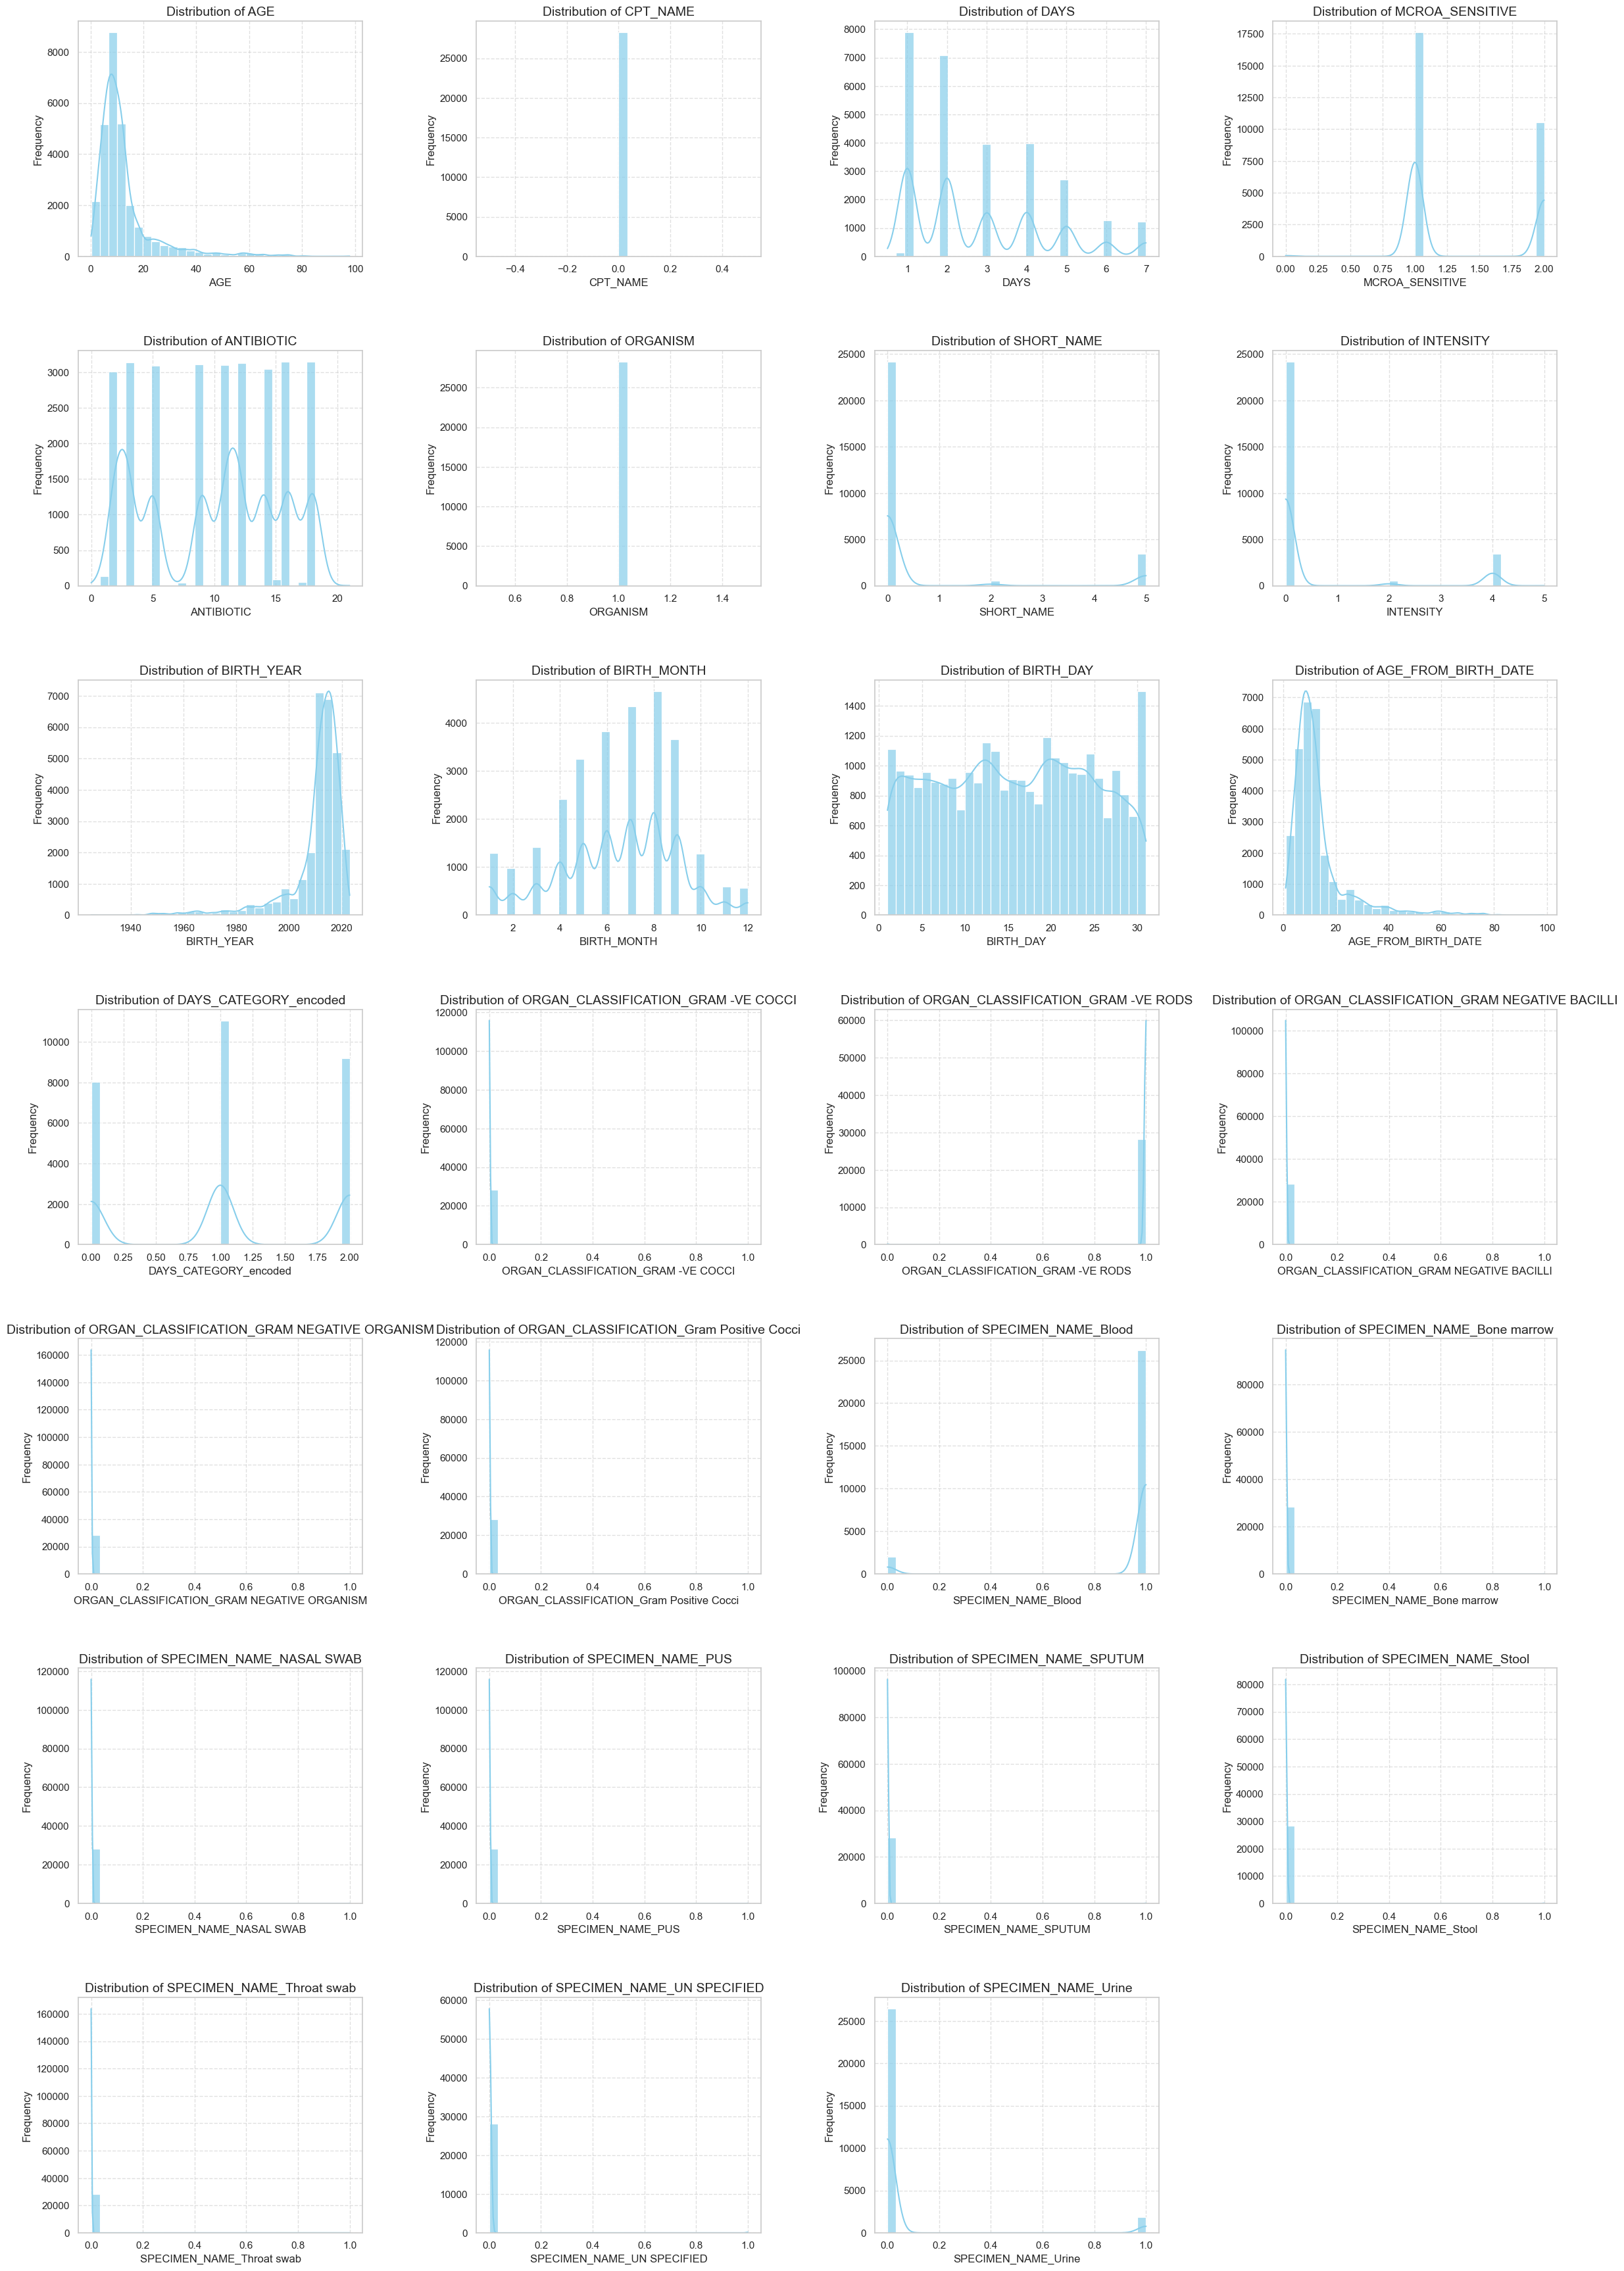

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="muted")

num_cols = df.select_dtypes(include=['float64', 'int32', 'int64', 'int8']).columns
num_plots = len(num_cols)

# Calculate grid size
cols = 4
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(cols * 6, rows * 5)) 
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=2.0)  
plt.subplots_adjust(hspace=0.4, wspace=0.4)  
plt.show()


#### **Correlation Analysis**

The primary purpose of a correlation matrix is to identify relationships between variables. If two variables are highly correlated, it might suggest that they have a strong linear relationship, which can be important in various analyses, such as feature selection in machine learning.

In [56]:
correlation_matrix = df.select_dtypes(include=['float64', 'int32', 'int64', 'int8']).corr()
print(correlation_matrix)


                                                  AGE  CPT_NAME      DAYS  \
AGE                                          1.000000       NaN  0.010784   
CPT_NAME                                          NaN       NaN       NaN   
DAYS                                         0.010784       NaN  1.000000   
MCROA_SENSITIVE                             -0.000294       NaN -0.004061   
ANTIBIOTIC                                   0.000004       NaN  0.002044   
ORGANISM                                          NaN       NaN       NaN   
SHORT_NAME                                   0.013917       NaN -0.109890   
INTENSITY                                    0.013755       NaN -0.111895   
BIRTH_YEAR                                  -0.999903       NaN -0.010177   
BIRTH_MONTH                                 -0.059966       NaN  0.003629   
BIRTH_DAY                                   -0.033932       NaN -0.016560   
AGE_FROM_BIRTH_DATE                          0.999218       NaN  0.008942   

##### **Identify Strong Correlations**

In [57]:
# Set a threshold for strong correlations
threshold = 0.8

# Find pairs of features with high correlations
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]
print("Strong correlations:")
print(strong_correlations)

Strong correlations:
                                                  AGE  CPT_NAME      DAYS  \
AGE                                          1.000000       NaN       NaN   
CPT_NAME                                          NaN       NaN       NaN   
DAYS                                              NaN       NaN  1.000000   
MCROA_SENSITIVE                                   NaN       NaN       NaN   
ANTIBIOTIC                                        NaN       NaN       NaN   
ORGANISM                                          NaN       NaN       NaN   
SHORT_NAME                                        NaN       NaN       NaN   
INTENSITY                                         NaN       NaN       NaN   
BIRTH_YEAR                                  -0.999903       NaN       NaN   
BIRTH_MONTH                                       NaN       NaN       NaN   
BIRTH_DAY                                         NaN       NaN       NaN   
AGE_FROM_BIRTH_DATE                          0.999218  

##### **Visualize the Correlation Matrix**

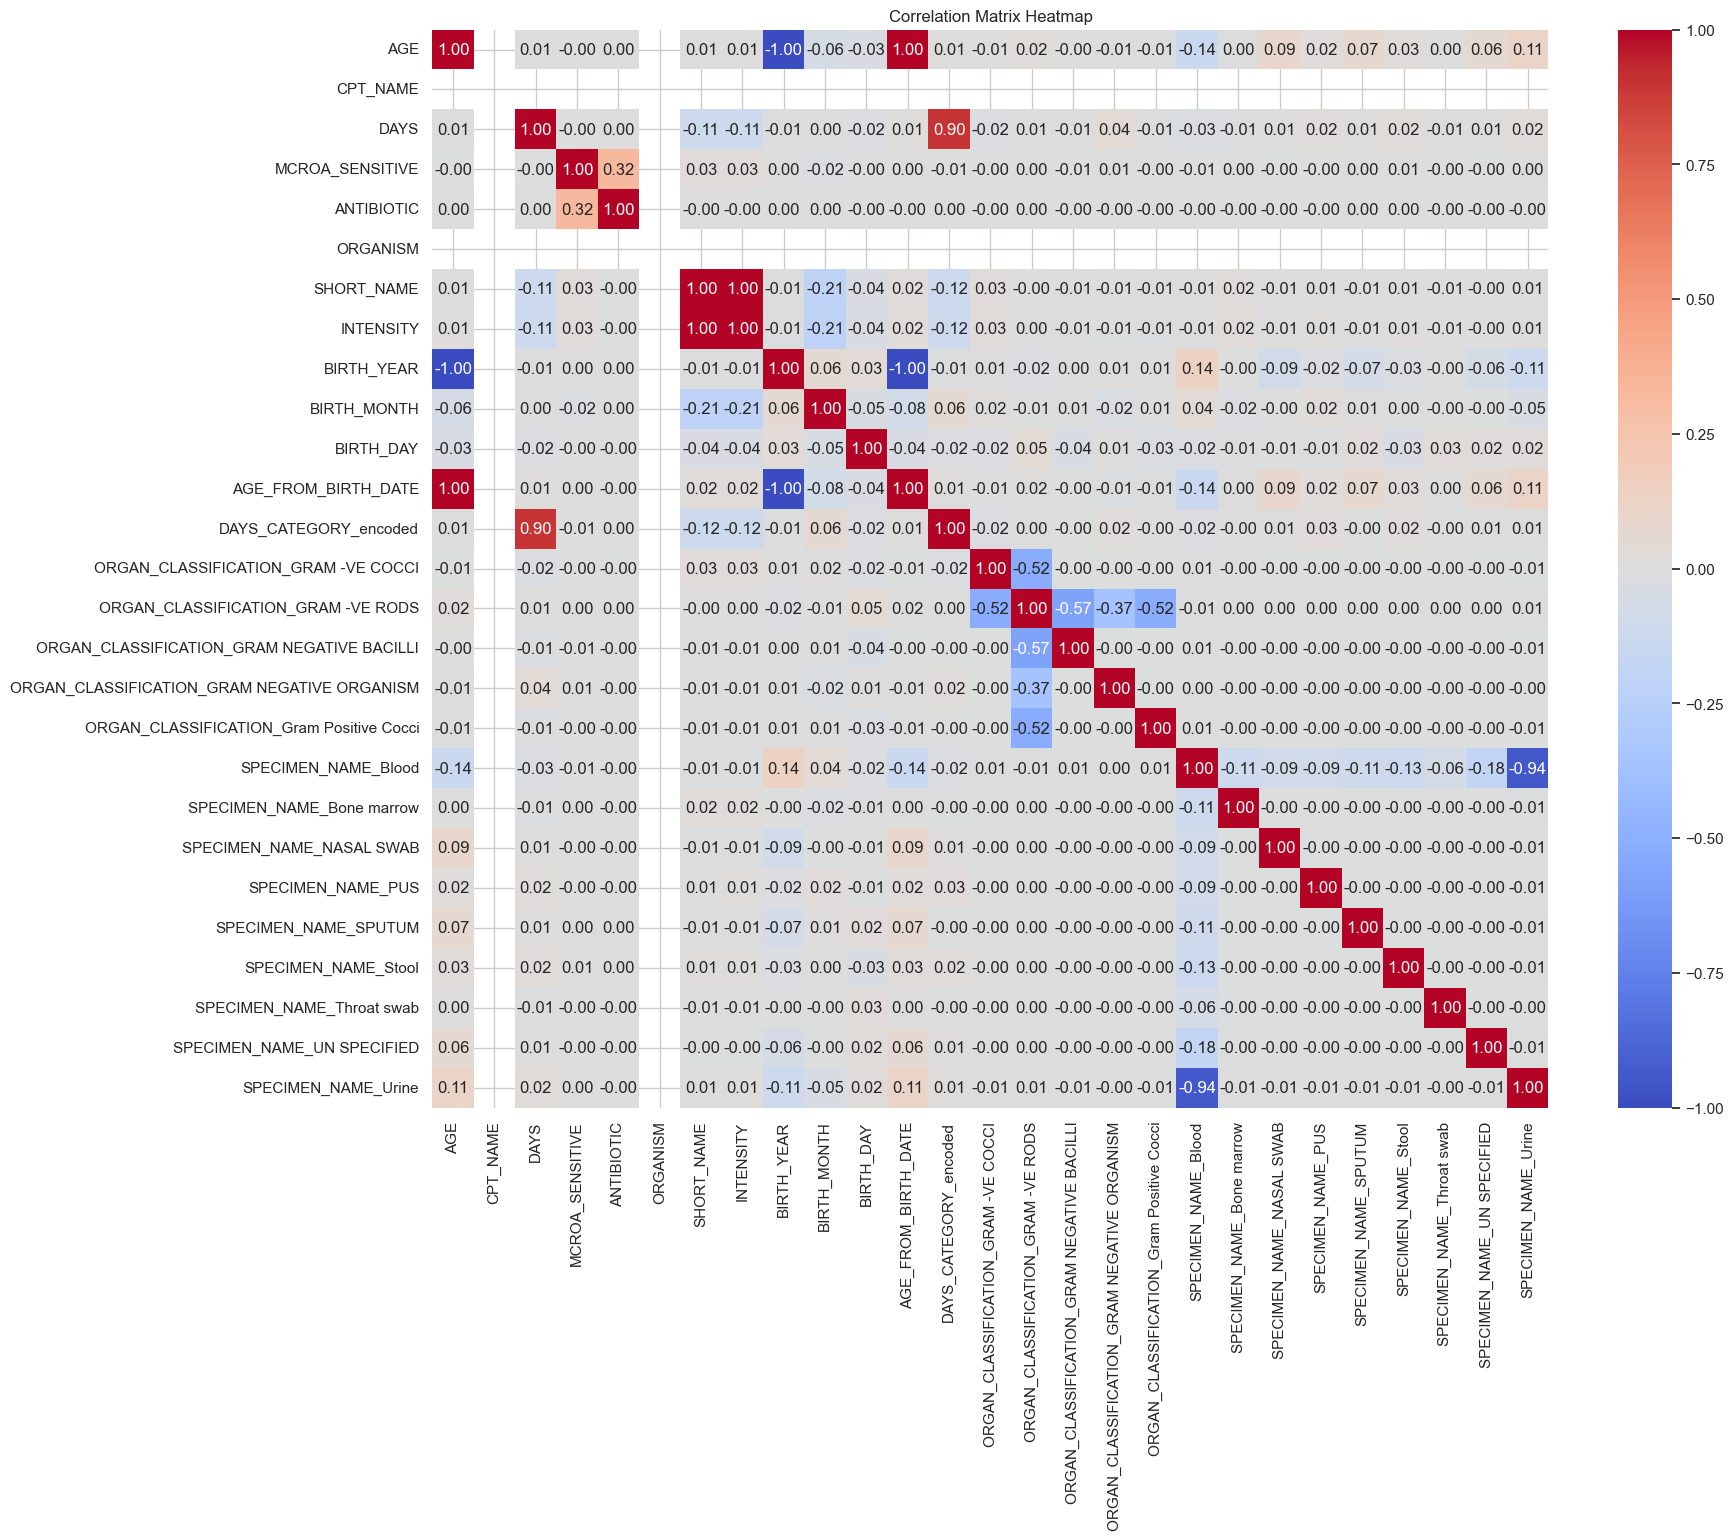

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


##### **Correlation with Target Variable**

Correlation with target:
MCROA_SENSITIVE                                1.000000
ANTIBIOTIC                                     0.324737
INTENSITY                                      0.027068
SHORT_NAME                                     0.026684
SPECIMEN_NAME_Stool                            0.007616
ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM    0.006829
SPECIMEN_NAME_Bone marrow                      0.004849
SPECIMEN_NAME_Urine                            0.004139
SPECIMEN_NAME_SPUTUM                           0.003441
ORGAN_CLASSIFICATION_GRAM -VE RODS             0.002377
AGE_FROM_BIRTH_DATE                            0.000470
BIRTH_YEAR                                     0.000087
AGE                                           -0.000294
SPECIMEN_NAME_UN SPECIFIED                    -0.000634
SPECIMEN_NAME_Throat swab                     -0.001231
ORGAN_CLASSIFICATION_GRAM -VE COCCI           -0.001742
SPECIMEN_NAME_PUS                             -0.001742
SPECIMEN_NAME_NASAL SWA

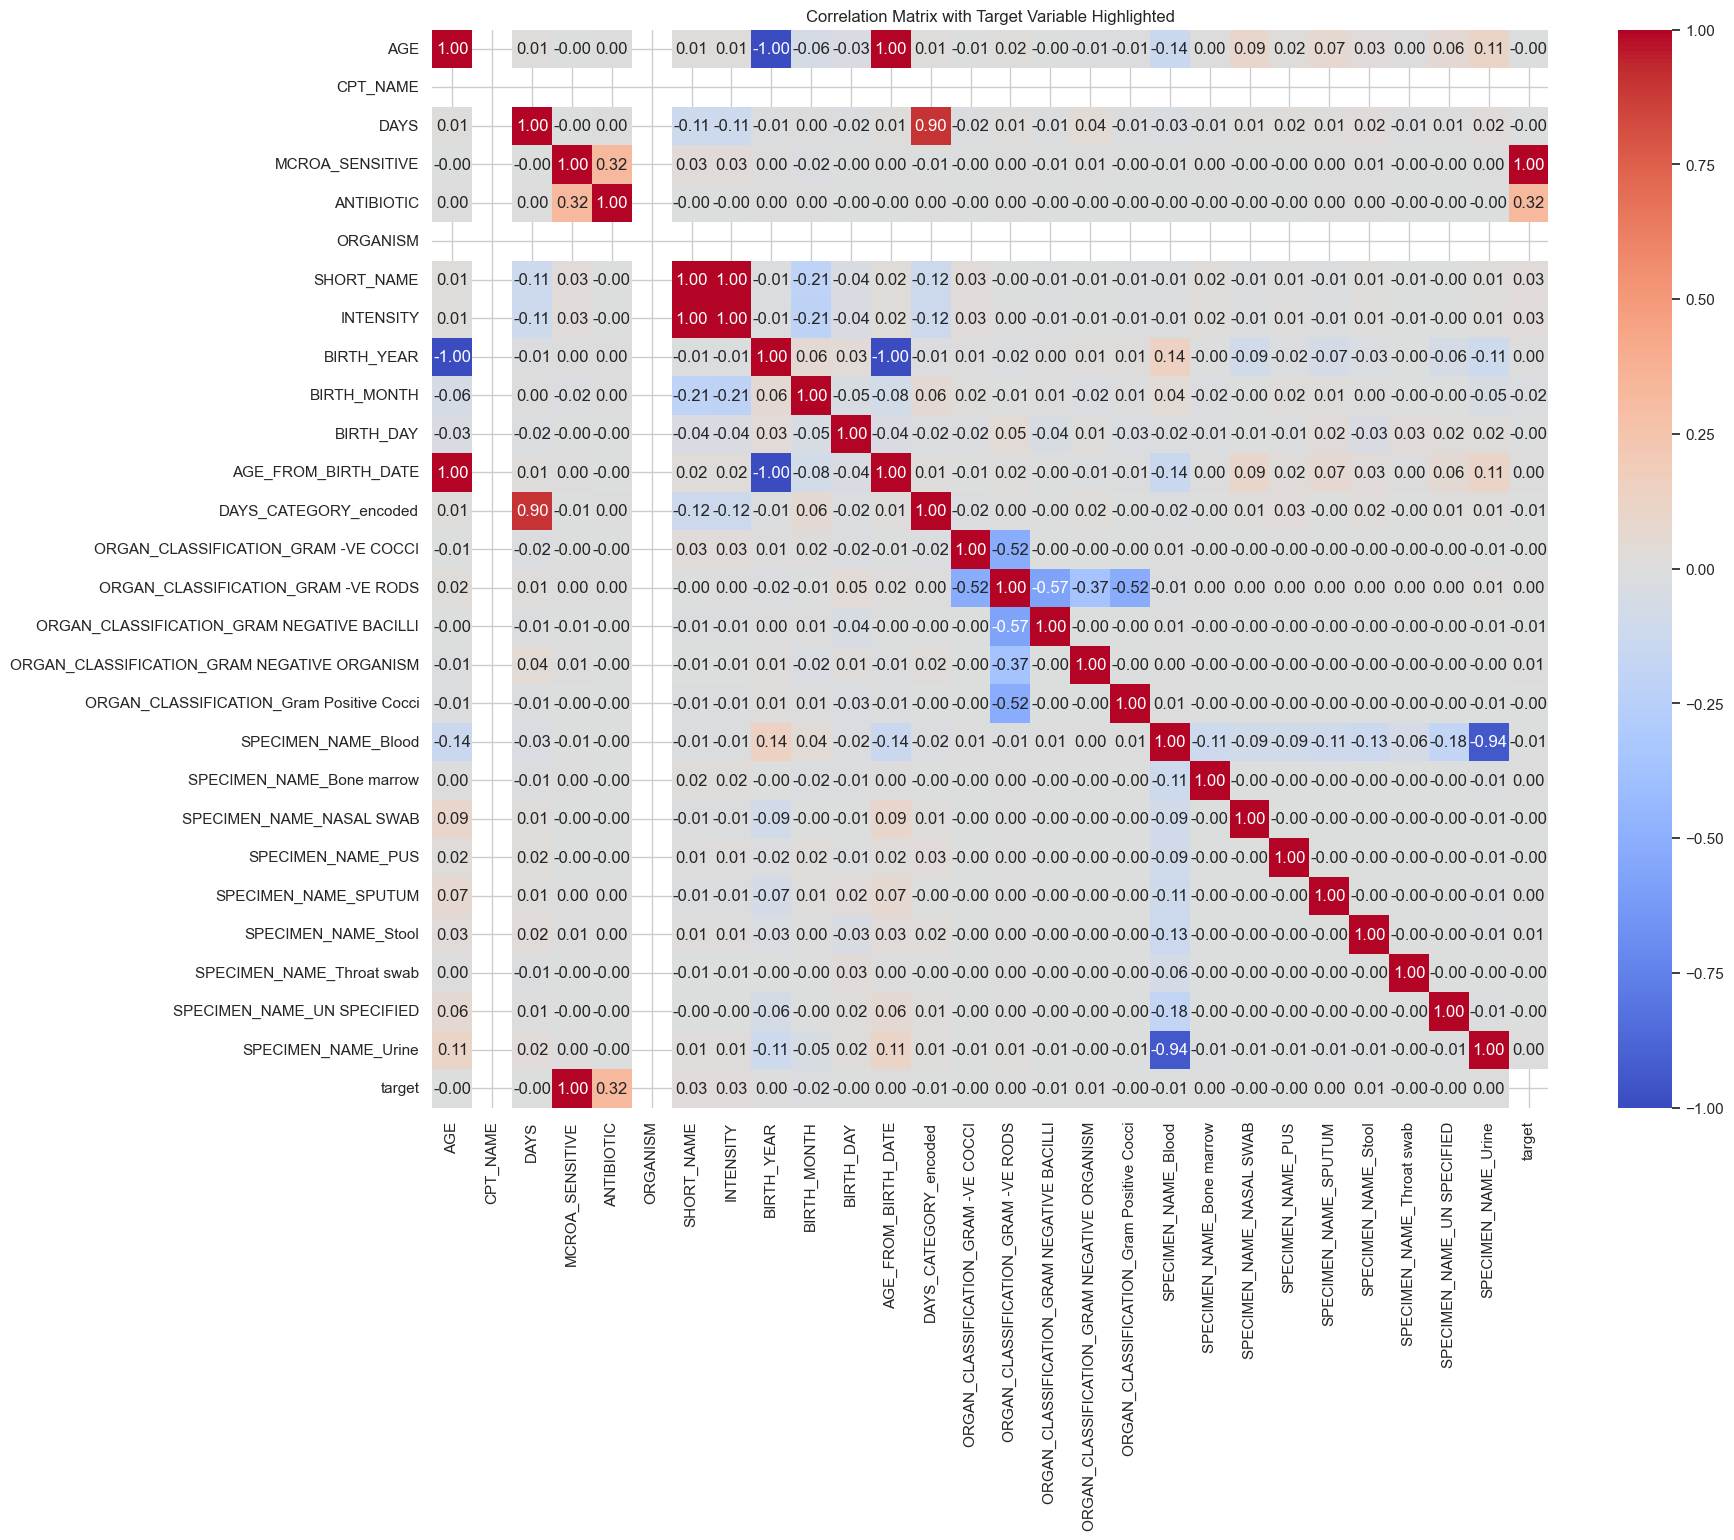

In [59]:
target_correlation = correlation_matrix['MCROA_SENSITIVE'].sort_values(ascending=False)
print("Correlation with target:")
print(target_correlation)

# Add a column for the target variable correlation
correlation_matrix_with_target = correlation_matrix.copy()
correlation_matrix_with_target['target'] = target_correlation

# Add a row for the target variable correlation
correlation_matrix_with_target.loc['target'] = target_correlation
correlation_matrix_with_target['target'] = correlation_matrix_with_target['target']

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix with Target Variable Highlighted')
plt.show()

Suumary :The correlation matrix reveals that age-related variables, such as BIRTH_YEAR and AGE_FROM_BIRTH_DATE, exhibit a strong correlation, reflecting consistency in age calculations. MCROA_SENSITIVE shows a moderate positive correlation with ANTIBIOTIC, indicating a potential relationship between sensitivity and antibiotics. Specimen-related variables, particularly SPECIMEN_NAME_Blood, demonstrate moderate negative correlations with AGE and other specimen types, suggesting distinct patterns in specimen data. Organ classification variables like ORGAN_CLASSIFICATION_GRAM -VE RODS and ORGAN_CLASSIFICATION_Gram Positive Cocci show significant negative correlations, indicating diverse gram classification patterns. Overall, while some variables have strong correlations, most features show weak or no significant linear relationships.

In [60]:
df.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                              int32
INTENSITY                                               int32
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY_encoded                                    int8
ORGAN_CLASSIFICATION_GRAM -VE COCCI                     int32
ORGAN_CL

## **Outliers Detection and Removing**

##### **Identification**

In [61]:
def find_outliers_iqr(df):
    outlier_summary = {}
    
    for column in df.select_dtypes(include=['float64', 'int32', 'int64']).columns:
        if df[column].nunique() > 1: 
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Calculate the number of outliers
            num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
            outlier_summary[column] = num_outliers

    return outlier_summary


outliers_summary = find_outliers_iqr(df)
print("Columns with Outliers:")
for column, count in outliers_summary.items():
    print(f"{column}: {count} outliers")

Columns with Outliers:
AGE: 3063 outliers
DAYS: 0 outliers
MCROA_SENSITIVE: 0 outliers
ANTIBIOTIC: 0 outliers
SHORT_NAME: 4092 outliers
INTENSITY: 4092 outliers
BIRTH_YEAR: 3063 outliers
BIRTH_MONTH: 0 outliers
BIRTH_DAY: 0 outliers
AGE_FROM_BIRTH_DATE: 3010 outliers
ORGAN_CLASSIFICATION_GRAM -VE COCCI: 18 outliers
ORGAN_CLASSIFICATION_GRAM -VE RODS: 67 outliers
ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI: 22 outliers
ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM: 9 outliers
ORGAN_CLASSIFICATION_Gram Positive Cocci: 18 outliers
SPECIMEN_NAME_Blood: 2046 outliers
SPECIMEN_NAME_Bone marrow: 27 outliers
SPECIMEN_NAME_NASAL SWAB: 18 outliers
SPECIMEN_NAME_PUS: 18 outliers
SPECIMEN_NAME_SPUTUM: 26 outliers
SPECIMEN_NAME_Stool: 36 outliers
SPECIMEN_NAME_Throat swab: 9 outliers
SPECIMEN_NAME_UN SPECIFIED: 72 outliers
SPECIMEN_NAME_Urine: 1840 outliers


##### **Removing**

In [62]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    
    for column in columns:
        if df_cleaned[column].dtype in ['float64', 'int32', 'int64']:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

columns_with_outliers = [
    'AGE', 'SHORT_NAME', 'INTENSITY', 'BIRTH_YEAR', 'AGE_FROM_BIRTH_DATE',
    'ORGAN_CLASSIFICATION_GRAM -VE COCCI', 'ORGAN_CLASSIFICATION_GRAM -VE RODS',
    'ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI', 'ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM',
    'ORGAN_CLASSIFICATION_Gram Positive Cocci', 'SPECIMEN_NAME_Blood',
    'SPECIMEN_NAME_Bone marrow', 'SPECIMEN_NAME_NASAL SWAB', 'SPECIMEN_NAME_PUS',
    'SPECIMEN_NAME_SPUTUM', 'SPECIMEN_NAME_Stool', 'SPECIMEN_NAME_Throat swab',
    'SPECIMEN_NAME_UN SPECIFIED', 'SPECIMEN_NAME_Urine'
]


df_cleaned = remove_outliers(df, columns_with_outliers)
df_cleaned.to_csv('cleaned_data.csv', index=False)
print(df_cleaned.head())

   AGE  CPT_NAME BIRTH_DATE  DAYS         REPORT_DATE  MCROA_SENSITIVE  \
0  1.0         0 2022-10-03   5.0 2022-10-26 12:14:02                1   
2  1.0         0 2022-11-08   2.0 2023-06-12 10:25:00                1   
3  1.0         0 2022-11-12   1.0 2023-05-19 10:27:43                1   
4  1.0         0 2021-12-22   1.0 2022-10-03 09:55:12                2   
5  1.0         0 2022-08-11   4.0 2023-08-15 12:25:52                1   

   ANTIBIOTIC  ORGANISM  SHORT_NAME  INTENSITY  ...  \
0           2         1           0          0  ...   
2           2         1           0          0  ...   
3          11         1           0          0  ...   
4           0         1           0          0  ...   
5           5         1           0          0  ...   

   ORGAN_CLASSIFICATION_Gram Positive Cocci  SPECIMEN_NAME_Blood  \
0                                         0                    1   
2                                         0                    1   
3                   

In [63]:
df_cleaned.dtypes

AGE                                                   float64
CPT_NAME                                                int32
BIRTH_DATE                                     datetime64[ns]
DAYS                                                  float64
REPORT_DATE                                    datetime64[ns]
MCROA_SENSITIVE                                         int32
ANTIBIOTIC                                              int32
ORGANISM                                                int64
SHORT_NAME                                              int32
INTENSITY                                               int32
BIRTH_YEAR                                              int32
BIRTH_MONTH                                             int32
BIRTH_DAY                                               int32
AGE_FROM_BIRTH_DATE                                     int64
DAYS_CATEGORY_encoded                                    int8
ORGAN_CLASSIFICATION_GRAM -VE COCCI                     int32
ORGAN_CL

In [64]:
missing_values_summary = df_cleaned.isna().sum()
print("Missing values in each column of df_cleaned:\n", missing_values_summary)

Missing values in each column of df_cleaned:
 AGE                                            0
CPT_NAME                                       0
BIRTH_DATE                                     0
DAYS                                           0
REPORT_DATE                                    0
MCROA_SENSITIVE                                0
ANTIBIOTIC                                     0
ORGANISM                                       0
SHORT_NAME                                     0
INTENSITY                                      0
BIRTH_YEAR                                     0
BIRTH_MONTH                                    0
BIRTH_DAY                                      0
AGE_FROM_BIRTH_DATE                            0
DAYS_CATEGORY_encoded                          0
ORGAN_CLASSIFICATION_GRAM -VE COCCI            0
ORGAN_CLASSIFICATION_GRAM -VE RODS             0
ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI     0
ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM    0
ORGAN_CLASSIFICATION_Gr

#### **Min Max Scaler**

In [65]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

In [66]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_cleaned[numeric_cols]), columns=numeric_cols)
df_standardized_final = pd.concat([df_cleaned[non_numeric_cols], df_standardized], axis=1)

##### **Unique values**

In [67]:
for column in df_standardized_final.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'CPT_NAME':
[0]

Unique values in column 'BIRTH_DATE':
<DatetimeArray>
['2022-10-03 00:00:00', '2022-11-08 00:00:00', '2022-11-12 00:00:00',
 '2021-12-22 00:00:00', '2022-08-11 00:00:00', '2022-04-04 00:00:00',
 '2022-05-05 00:00:00', '2022-07-20 00:00:00', '2022-04-20 00:00:00',
 '2022-09-12 00:00:00',
 ...
 '2014-05-10 00:00:00', '2014-09-24 00:00:00', '2014-10-01 00:00:00',
 '2014-09-02 00:00:00', '2014-02-02 00:00:00', '2014-05-13 00:00:00',
 '2014-09-14 00:00:00', '2014-09-30 00:00:00', '2014-07-07 00:00:00',
 '2014-08-04 00:00:00']
Length: 1553, dtype: datetime64[ns]

Unique values in column 'REPORT_DATE':
<DatetimeArray>
['2022-10-26 12:14:02', '2023-06-12 10:25:00', '2023-05-19 10:27:43',
 '2022-10-03 09:55:12', '2023-08-15 12:25:52', '2022-06-09 11:07:38',
 '2023-05-10 11:34:40', '2022-08-17 08:58:23', '2023-04-26 11:06:19',
 '2023-09-15 11:15:11',
 ...
 '2022-09-20 11:10:04', '2023-02-08 11:52:12', '2022-06-07 10:37:08',
 '2023-06-06 10:32:57', '2022-1

## **Statustical test and hypothesis**

##### **Does the average age differ between different specimen types?**

In [68]:
import pandas as pd
from scipy import stats

# Prepare data for ANOVA
# We assume you have columns like SPECIMEN_NAME_Blood, SPECIMEN_NAME_Urine, etc.
specimen_types = ['SPECIMEN_NAME_Blood', 'SPECIMEN_NAME_Bone marrow', 'SPECIMEN_NAME_NASAL SWAB', 
                   'SPECIMEN_NAME_PUS', 'SPECIMEN_NAME_SPUTUM', 'SPECIMEN_NAME_Stool', 
                   'SPECIMEN_NAME_Throat swab', 'SPECIMEN_NAME_UN SPECIFIED', 'SPECIMEN_NAME_Urine']

# Create a dictionary to store age lists for each specimen type
age_groups = {}
for specimen in specimen_types:
    age_groups[specimen] = df[df[specimen] == 1]['AGE'].dropna().tolist()

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*age_groups.values())

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in average age between different specimen types.")
else:
    print("There is no significant difference in average age between different specimen types.")


F-statistic: 109.43310313810902
P-value: 7.734232974660519e-181
There is a significant difference in average age between different specimen types.


##### **Is there a significant association between antibiotic sensitivity and the type of organism?**

In [69]:
from scipy.stats import chi2_contingency

# Prepare the data: Create a contingency table
contingency_table = pd.crosstab(df['MCROA_SENSITIVE'], df['ORGANISM'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between antibiotic sensitivity and the type of organism.")
else:
    print("There is no significant association between antibiotic sensitivity and the type of organism.")


Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies Table:
[[  136.]
 [17620.]
 [10522.]]
There is no significant association between antibiotic sensitivity and the type of organism.


##### **Another test**

In [70]:
from scipy.stats import f_oneway
# Define the age groups 
bins = [0, 20, 40, 60, 80, 100]  # Define age bins
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Convert the `ANTIBIOTIC` and `AGE_GROUP` to categorical 
df['ANTIBIOTIC'] = df['ANTIBIOTIC'].astype('category')

# Group data by age group and collect antibiotic sensitivity scores for each group
age_groups = df['AGE_GROUP'].unique()
grouped_data = [df[df['AGE_GROUP'] == group]['ANTIBIOTIC'] for group in age_groups]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)

# Print results
print(f"ANOVA F-Statistic: {f_stat:.4f}")
print(f"ANOVA p-Value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in antibiotic sensitivity across age groups.")
else:
    print("There is no significant difference in antibiotic sensitivity across age groups.")


ANOVA F-Statistic: 0.0009
ANOVA p-Value: 1.0000
There is no significant difference in antibiotic sensitivity across age groups.


##### **Another Hypotheis**

In [71]:
import scipy.stats as stats

correlation_coefficient, p_value = stats.pearsonr(df['AGE'], df['INTENSITY'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"p-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between age and intensity of antibiotic resistance.")
else:
    print("There is no significant relationship between age and intensity of antibiotic resistance.")

Pearson Correlation Coefficient: 0.0138
p-Value: 0.0207
There is a significant relationship between age and intensity of antibiotic resistance.


In [72]:
print(df_cleaned.head())

   AGE  CPT_NAME BIRTH_DATE  DAYS         REPORT_DATE  MCROA_SENSITIVE  \
0  1.0         0 2022-10-03   5.0 2022-10-26 12:14:02                1   
2  1.0         0 2022-11-08   2.0 2023-06-12 10:25:00                1   
3  1.0         0 2022-11-12   1.0 2023-05-19 10:27:43                1   
4  1.0         0 2021-12-22   1.0 2022-10-03 09:55:12                2   
5  1.0         0 2022-08-11   4.0 2023-08-15 12:25:52                1   

   ANTIBIOTIC  ORGANISM  SHORT_NAME  INTENSITY  ...  \
0           2         1           0          0  ...   
2           2         1           0          0  ...   
3          11         1           0          0  ...   
4           0         1           0          0  ...   
5           5         1           0          0  ...   

   ORGAN_CLASSIFICATION_Gram Positive Cocci  SPECIMEN_NAME_Blood  \
0                                         0                    1   
2                                         0                    1   
3                   

## **Getting ready data for Modeling**

#### **Define the target column and feature columns**

In [73]:
print(df_cleaned.columns)

Index(['AGE', 'CPT_NAME', 'BIRTH_DATE', 'DAYS', 'REPORT_DATE',
       'MCROA_SENSITIVE', 'ANTIBIOTIC', 'ORGANISM', 'SHORT_NAME', 'INTENSITY',
       'BIRTH_YEAR', 'BIRTH_MONTH', 'BIRTH_DAY', 'AGE_FROM_BIRTH_DATE',
       'DAYS_CATEGORY_encoded', 'ORGAN_CLASSIFICATION_GRAM -VE COCCI',
       'ORGAN_CLASSIFICATION_GRAM -VE RODS',
       'ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI',
       'ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM',
       'ORGAN_CLASSIFICATION_Gram Positive Cocci', 'SPECIMEN_NAME_Blood',
       'SPECIMEN_NAME_Bone marrow', 'SPECIMEN_NAME_NASAL SWAB',
       'SPECIMEN_NAME_PUS', 'SPECIMEN_NAME_SPUTUM', 'SPECIMEN_NAME_Stool',
       'SPECIMEN_NAME_Throat swab', 'SPECIMEN_NAME_UN SPECIFIED',
       'SPECIMEN_NAME_Urine'],
      dtype='object')


In [74]:
unique_values = df['MCROA_SENSITIVE'].unique()
print("Unique values in 'MCROA_SENSITIVE':", unique_values)

Unique values in 'MCROA_SENSITIVE': [1 2 0]


In [75]:
df_cleaned['BIRTH_DATE'] = pd.to_datetime(df_cleaned['BIRTH_DATE'], errors='coerce')
df_cleaned['REPORT_DATE'] = pd.to_datetime(df_cleaned['REPORT_DATE'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['BIRTH_DATE', 'REPORT_DATE'])  

df_cleaned['BIRTH_YEAR'] = df_cleaned['BIRTH_DATE'].dt.year
df_cleaned['REPORT_YEAR'] = df_cleaned['REPORT_DATE'].dt.year
df_cleaned['REPORT_MONTH'] = df_cleaned['REPORT_DATE'].dt.month
df_cleaned['REPORT_DAY'] = df_cleaned['REPORT_DATE'].dt.day

df_cleaned = df_cleaned.drop(columns=['BIRTH_DATE', 'REPORT_DATE'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_cleaned.drop(columns=['MCROA_SENSITIVE'])  # Exclude the target column
y = df_cleaned['MCROA_SENSITIVE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [76]:
print(X_train.dtypes)
print(X_test.dtypes)

AGE                                            float64
CPT_NAME                                         int32
DAYS                                           float64
ANTIBIOTIC                                       int32
ORGANISM                                         int64
SHORT_NAME                                       int32
INTENSITY                                        int32
BIRTH_YEAR                                       int32
BIRTH_MONTH                                      int32
BIRTH_DAY                                        int32
AGE_FROM_BIRTH_DATE                              int64
DAYS_CATEGORY_encoded                             int8
ORGAN_CLASSIFICATION_GRAM -VE COCCI              int32
ORGAN_CLASSIFICATION_GRAM -VE RODS               int32
ORGAN_CLASSIFICATION_GRAM NEGATIVE BACILLI       int32
ORGAN_CLASSIFICATION_GRAM NEGATIVE ORGANISM      int32
ORGAN_CLASSIFICATION_Gram Positive Cocci         int32
SPECIMEN_NAME_Blood                              int32
SPECIMEN_N

#### **Stander Scaler**

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Based Line Models**

#### **Decision Tree**

Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.06      0.06        18
           1       0.96      0.96      0.96      2443
           2       0.93      0.94      0.93      1457

    accuracy                           0.95      3918
   macro avg       0.65      0.65      0.65      3918
weighted avg       0.95      0.95      0.95      3918

Confusion Matrix:
[[   1    6   11]
 [   8 2337   98]
 [   7   84 1366]]


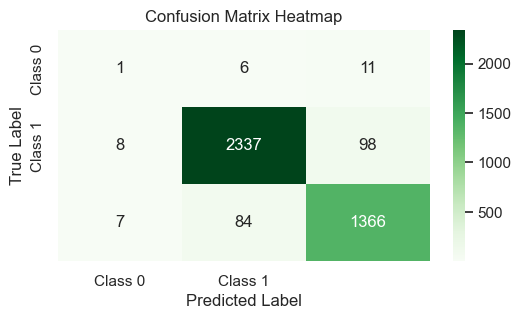

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


#### **HyperParameter Tunining using Gridsearccv**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score Found:  0.9569240587109127
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.11      0.17        18
           1       0.95      0.99      0.97      2443
           2       0.97      0.92      0.95      1457

    accuracy                           0.96      3918
   macro avg       0.77      0.67      0.70      3918
weighted avg       0.96      0.96      0.96      3918

Confusion Matrix:
[[   2    8    8]
 [   0 2409   34]
 [   3  108 1346]]


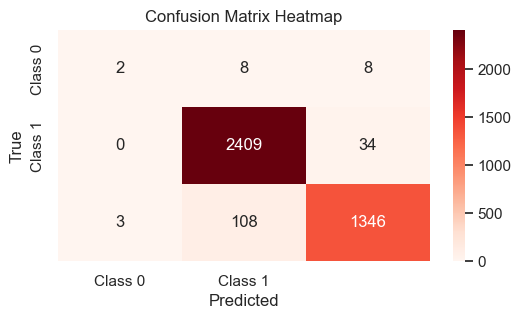

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

# Define the hyperparameters to tune
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                                    param_distributions=param_dist, 
                                    n_iter=50, # Number of parameter settings sampled
                                    cv=5, 
                                    n_jobs=-1, 
                                    verbose=2, 
                                    random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best Parameters Found: ", random_search.best_params_)
print("Best Score Found: ", random_search.best_score_)

# Use the best model to make predictions
best_dt_model = random_search.best_estimator_
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluate the best model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [80]:
print(y_train.value_counts())
print(y_test.value_counts())

MCROA_SENSITIVE
1    9900
2    5692
0      78
Name: count, dtype: int64
MCROA_SENSITIVE
1    2443
2    1457
0      18
Name: count, dtype: int64


#### **Logestic Regression**

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.80      0.98      0.89      2443
           2       0.96      0.61      0.75      1457

    accuracy                           0.84      3918
   macro avg       0.59      0.53      0.54      3918
weighted avg       0.86      0.84      0.83      3918

Confusion Matrix (Logistic Regression):
[[   0   18    0]
 [   0 2406   37]
 [   0  566  891]]


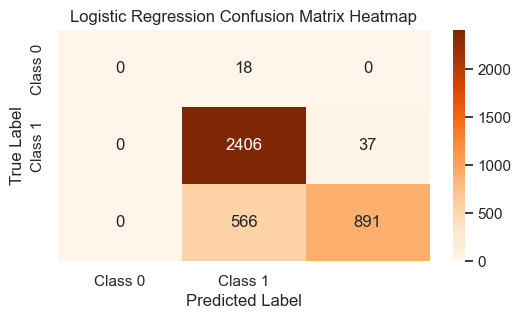

In [81]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.show()


#### **K-Nearest Neighbors**

Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.78      0.89      0.83      2443
           2       0.77      0.60      0.67      1457

    accuracy                           0.78      3918
   macro avg       0.52      0.50      0.50      3918
weighted avg       0.77      0.78      0.77      3918

Confusion Matrix (K-Nearest Neighbors):
[[   0   16    2]
 [   2 2181  260]
 [   1  584  872]]


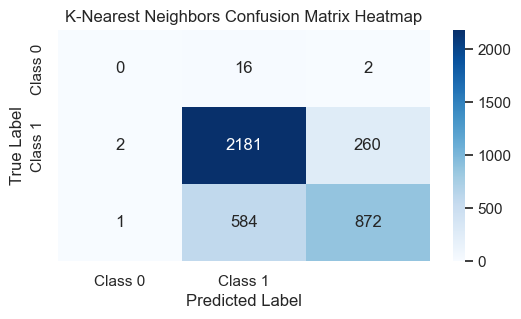

In [82]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("Classification Report (K-Nearest Neighbors):")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix (K-Nearest Neighbors):")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('K-Nearest Neighbors Confusion Matrix Heatmap')
plt.show()

#### **Support Vector Classifier**

Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.80      0.99      0.89      2443
           2       0.98      0.60      0.75      1457

    accuracy                           0.84      3918
   macro avg       0.59      0.53      0.54      3918
weighted avg       0.86      0.84      0.83      3918

Confusion Matrix (Support Vector Machine):
[[   0   18    0]
 [   0 2425   18]
 [   0  580  877]]


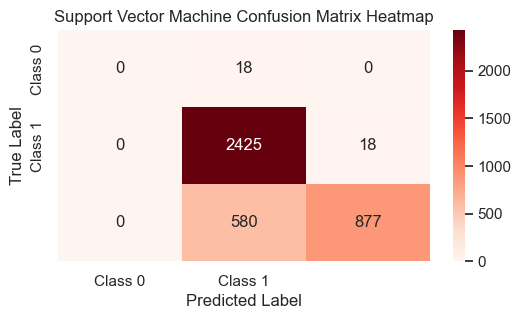

In [83]:
import warnings
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("Classification Report (Support Vector Machine):")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix (Support Vector Machine):")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Machine Confusion Matrix Heatmap')
plt.show()


### **Dimenstion Reduction plus GradientBoostingClassifier**

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.95      0.99      0.97      2443
           2       0.98      0.91      0.94      1457

    accuracy                           0.96      3918
   macro avg       0.64      0.63      0.64      3918
weighted avg       0.96      0.96      0.96      3918

Confusion Matrix (Gradient Boosting):
[[   0    9    9]
 [   5 2425   13]
 [   2  131 1324]]


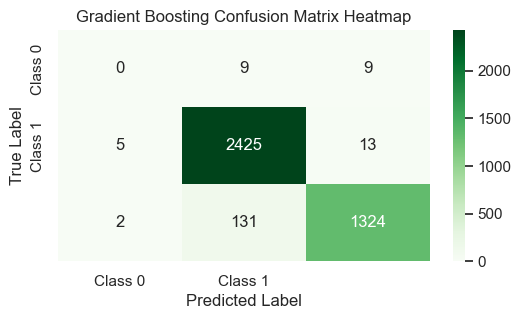

In [84]:
import warnings
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

pca = PCA(n_components=5)  # Reduce to 5 principal components (you can adjust this number)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_pca, y_train)

y_pred_gb = gb_model.predict(X_test_pca)

print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix (Gradient Boosting):")
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Confusion Matrix Heatmap')
plt.show()

#### **GaussianNB**

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.80      0.99      0.89      2443
           2       0.96      0.61      0.75      1457

    accuracy                           0.84      3918
   macro avg       0.59      0.53      0.54      3918
weighted avg       0.86      0.84      0.83      3918

Confusion Matrix (Naive Bayes):
[[   0   17    1]
 [   0 2409   34]
 [   0  569  888]]


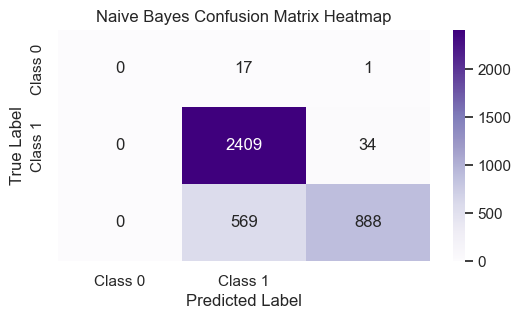

In [85]:
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix (Naive Bayes):")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes Confusion Matrix Heatmap')
plt.show()

#### **RandomForestClassifier**

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.93      0.98      0.95      2443
           2       0.95      0.88      0.92      1457

    accuracy                           0.94      3918
   macro avg       0.63      0.62      0.62      3918
weighted avg       0.93      0.94      0.93      3918

Confusion Matrix (Random Forest):
[[   0   11    7]
 [   1 2384   58]
 [   2  170 1285]]


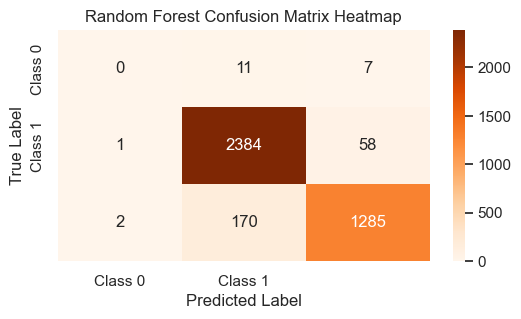

In [86]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

plt.figure(figsize=(6, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.show()

##### **An ANN, and display the error curve to identify if there is any overfitting or underfitting.**

In [87]:
# Map numerical values: assume 0 for resistance, 1 for sensitivity, and 2 for resistance
df_cleaned['MCROA_SENSITIVE'] = df_cleaned['MCROA_SENSITIVE'].map({0: 0, 1: 1, 2: 0})

print("Unique values in 'MCROA_SENSITIVE' after conversion:")
print(df_cleaned['MCROA_SENSITIVE'].unique())

print("Sample of 'MCROA_SENSITIVE' column after conversion:")
print(df_cleaned[['MCROA_SENSITIVE']].head())

Unique values in 'MCROA_SENSITIVE' after conversion:
[1 0]
Sample of 'MCROA_SENSITIVE' column after conversion:
   MCROA_SENSITIVE
0                1
2                1
3                1
4                0
5                1


Epoch 1/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7256 - loss: 0.5781 - val_accuracy: 0.8297 - val_loss: 0.3756
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8395 - loss: 0.3466 - val_accuracy: 0.8246 - val_loss: 0.3389
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.3321 - val_accuracy: 0.8505 - val_loss: 0.3351
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.3199 - val_accuracy: 0.8542 - val_loss: 0.3259
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.3069 - val_accuracy: 0.8451 - val_loss: 0.3267
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8482 - loss: 0.3201 - val_accuracy: 0.8498 - val_loss: 0.3193
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3053 - val_accuracy: 0.8509 - val_loss: 0.3139
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.2995 - val_accuracy: 0.

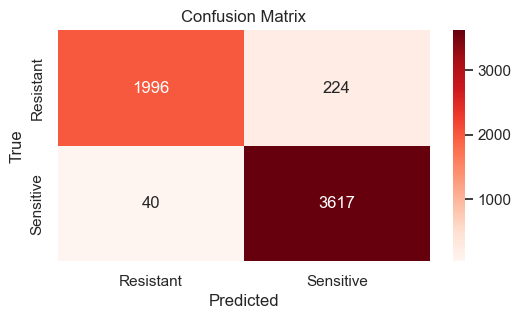

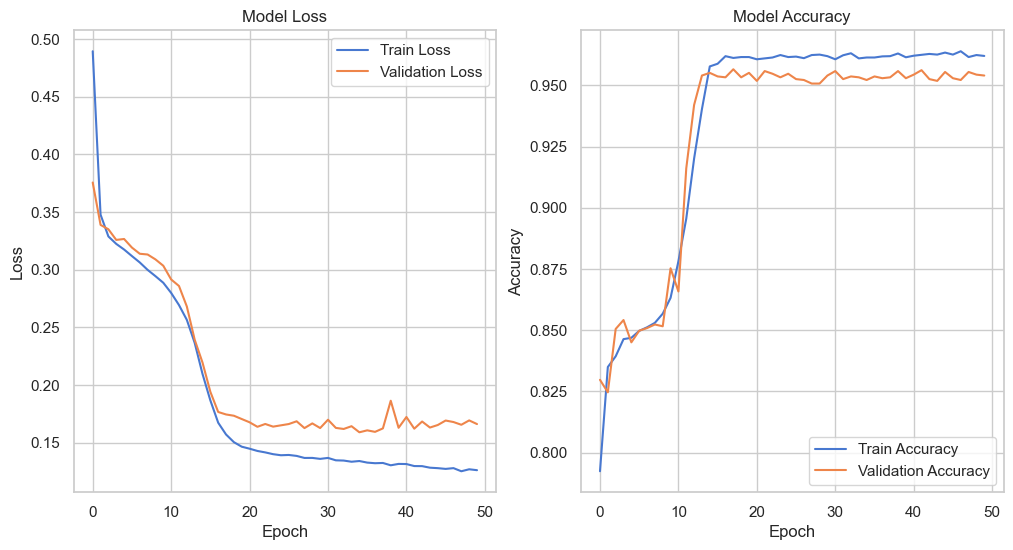


Summary of Overfitting and Underfitting:
Final Training Loss: 0.1263
Final Validation Loss: 0.1663
Final Training Accuracy: 0.9621
Final Validation Accuracy: 0.9541
Model might be overfitting as training loss is lower than validation loss.


In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import History


X = df_cleaned.drop(columns=['MCROA_SENSITIVE'])
y = df_cleaned['MCROA_SENSITIVE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer specifying the shape of the input data
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Print evaluation metrics
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Resistant', 'Sensitive'], yticklabels=['Resistant', 'Sensitive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Summary of overfitting and underfitting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print("\nSummary of Overfitting and Underfitting:")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

if final_train_loss < final_val_loss:
    print("Model might be overfitting as training loss is lower than validation loss.")
elif final_train_loss > final_val_loss:
    print("Model might be underfitting as training loss is higher than validation loss.")
else:
    print("Model is fitting well if both training and validation losses are similar.")


#### **A model with some convolutional layers at the start (1D convolutional layer) followed by ANN layers; display the error curve and identify if there is any overfitting or underfitting.**

Epoch 1/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7437 - loss: 0.5610 - val_accuracy: 0.8421 - val_loss: 0.3604
Epoch 2/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3530 - val_accuracy: 0.8487 - val_loss: 0.3435
Epoch 3/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3231 - val_accuracy: 0.8491 - val_loss: 0.3360
Epoch 4/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8480 - loss: 0.3223 - val_accuracy: 0.8494 - val_loss: 0.3306
Epoch 5/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.3053 - val_accuracy: 0.8505 - val_loss: 0.3151
Epoch 6/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8497 - loss: 0.3075 - val_accuracy: 0.8494 - val_loss: 0.3136
Epoch 7/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8667 - loss: 0.2852 - val_accuracy: 0.9172 - val_loss: 0.2903
Epoch 8/20
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2488 - val_accuracy: 0.

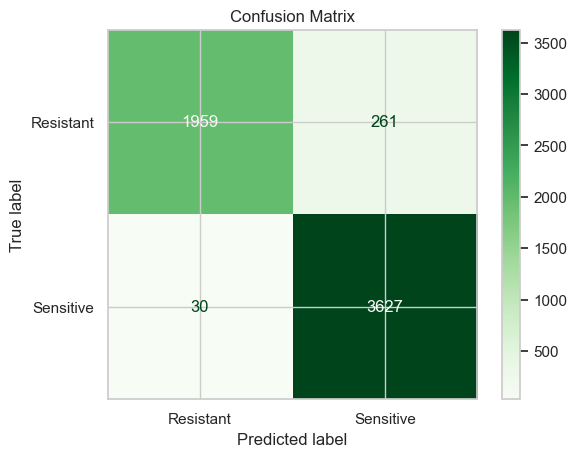

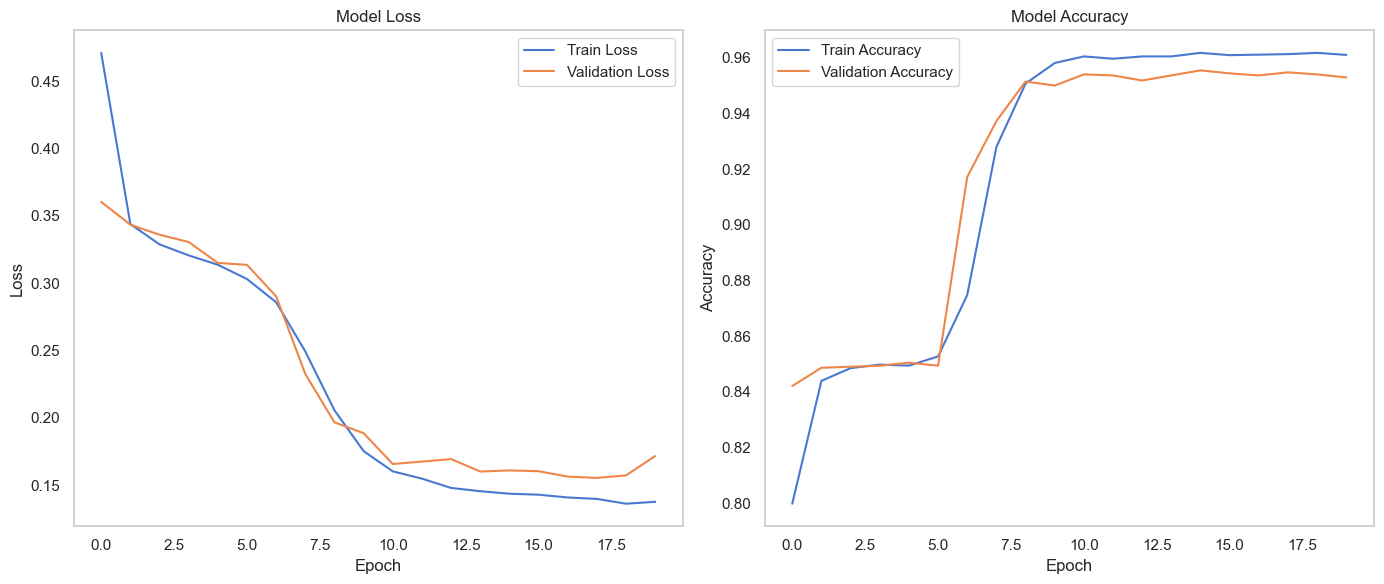


Summary of Overfitting and Underfitting:
Final Training Loss: 0.1377
Final Validation Loss: 0.1717
Final Training Accuracy: 0.9611
Final Validation Accuracy: 0.9530
Model might be overfitting as training loss is lower than validation loss.


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = df_cleaned.drop(columns=['MCROA_SENSITIVE'])
y = df_cleaned['MCROA_SENSITIVE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D (samples, time_steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer specifying shape
model.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Resistant', 'Sensitive'])
disp.plot(cmap=plt.cm.Greens, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Plot learning curves
plt.figure(figsize=(14, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Summary of Overfitting and Underfitting
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("\nSummary of Overfitting and Underfitting:")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

if final_train_loss < final_val_loss:
    print("Model might be overfitting as training loss is lower than validation loss.")
elif final_train_loss > final_val_loss:
    print("Model might be underfitting as training loss is higher than validation loss.")
else:
    print("Model seems to be well-fitted with balanced training and validation losses.")
